In [60]:
import pandas as pd
import IPython
from pathlib import Path
import ffmpeg
from ffmpeg_normalize import FFmpegNormalize
import librosa
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

In [61]:
BASE_PATH = Path('../note-spider/data').resolve()
OUTPUT_PATH = Path('./normalized').resolve()
BASE_PATH.absolute(), OUTPUT_PATH.absolute()

(PosixPath('/Users/origami/Desktop/projects/muse/packages/note-spider/data'),
 PosixPath('/Users/origami/Desktop/projects/muse/packages/notebooks/normalized'))

In [73]:
df = pd.read_csv('./output.csv')
df.head()

,url,relative_path,year,group,instrument,subtype,dynamics,note,notes,tags,duration,top10db_duration,top10db_ratio,top15db_duration,top15db_ratio
0,https://theremin.music.uiowa.edu/sound files/M...,pre2012/woodwinds/oboe/default/Oboe.pp.Bb3B3.aiff,pre2012,woodwinds,oboe,NaN,pp,Bb3B3,"['Bb3', 'B3']","['B3', 'Bb3', 'Bb3B3', 'oboe', 'woodwinds']",4.821043,4.365351,0.91,4.423401,0.92
1,https://theremin.music.uiowa.edu/sound files/M...,pre2012/woodwinds/oboe/default/Oboe.pp.C4B4.aiff,pre2012,woodwinds,oboe,NaN,pp,C4B4,"['C4', 'B4']","['C4', 'oboe', 'woodwinds', 'C4B4', 'B4']",41.442472,40.611701,0.98,40.843900,0.99
2,https://theremin.music.uiowa.edu/sound files/M...,pre2012/woodwinds/oboe/default/Oboe.pp.C5B5.aiff,pre2012,woodwinds,oboe,NaN,pp,C5B5,"['C5', 'B5']","['C5B5', 'C5', 'B5', 'oboe', 'woodwinds']",46.219320,41.145760,0.89,45.162812,0.98
3,https://theremin.music.uiowa.edu/sound files/M...,pre2012/woodwinds/oboe/default/Oboe.pp.C6Ab6.aiff,pre2012,woodwinds,oboe,NaN,pp,C6Ab6,"['C6', 'Ab6']","['Ab6', 'C6Ab6', 'C6', 'oboe', 'woodwinds']",34.330998,33.320635,0.97,33.355465,0.97
4,https://theremin.music.uiowa.edu/sound files/M...,pre2012/woodwinds/oboe/default/Oboe.mf.Bb3B3.aiff,pre2012,woodwinds,oboe,NaN,mf,Bb3B3,"['Bb3', 'B3']","['B3', 'Bb3', 'Bb3B3', 'oboe', 'woodwinds']",6.048798,5.421859,0.90,5.468299,0.90


In [74]:
piano = df[df['instrument'] == 'piano']
piano = piano.reset_index(drop=True)
piano.head()

,url,relative_path,year,group,instrument,subtype,dynamics,note,notes,tags,duration,top10db_duration,top10db_ratio,top15db_duration,top15db_ratio
0,https://theremin.music.uiowa.edu/sound files/M...,pre2012/piano/piano/default/Piano.pp.Bb0.aiff,pre2012,piano,piano,NaN,pp,Bb0,['Bb0'],"['Bb0', 'piano']",35.882177,0.812698,0.02,2.739955,0.08
1,https://theremin.music.uiowa.edu/sound files/M...,pre2012/piano/piano/default/Piano.pp.B0.aiff,pre2012,piano,piano,NaN,pp,B0,['B0'],"['piano', 'B0']",34.275102,2.751565,0.08,6.304218,0.18
2,https://theremin.music.uiowa.edu/sound files/M...,pre2012/piano/piano/default/Piano.pp.C1.aiff,pre2012,piano,piano,NaN,pp,C1,['C1'],"['C1', 'piano']",33.518163,2.821224,0.08,6.408707,0.19
3,https://theremin.music.uiowa.edu/sound files/M...,pre2012/piano/piano/default/Piano.pp.Db1.aiff,pre2012,piano,piano,NaN,pp,Db1,['Db1'],"['Db1', 'piano']",32.618503,1.962086,0.06,32.113197,0.98
4,https://theremin.music.uiowa.edu/sound files/M...,pre2012/piano/piano/default/Piano.pp.D1.aiff,pre2012,piano,piano,NaN,pp,D1,['D1'],"['D1', 'piano']",38.634785,1.822766,0.05,3.332063,0.09


In [75]:
piano.value_counts('dynamics')

dynamics
ff    88
pp    87
mf    86
dtype: int64

In [76]:
piano_ff = piano.groupby('dynamics').get_group('ff')
piano_pp = piano[piano['dynamics'] == 'pp']
piano_mf = piano[piano['dynamics'] == 'mf']

In [77]:
def get_violin(row):
    return row['instrument'] == 'violin' and row['year'] == 'post2012'
violin = df[df.apply(get_violin, axis=1)]
violin_pizzicato = violin[violin['subtype'] == 'pizzicato']
violin_arco = violin[violin['subtype'] == 'arco']
violin.head()

,url,relative_path,year,group,instrument,subtype,dynamics,note,notes,tags,duration,top10db_duration,top10db_ratio,top15db_duration,top15db_ratio
2415,https://theremin.music.uiowa.edu/sound files/M...,post2012/strings/violin/arco/Violin.arco.ff.su...,post2012,strings,violin,arco,ff,G3,['G3'],"['arco', 'violin', 'G3', 'strings']",4.273039,0.731429,0.17,0.940408,0.22
2416,https://theremin.music.uiowa.edu/sound files/M...,post2012/strings/violin/arco/Violin.arco.ff.su...,post2012,strings,violin,arco,ff,Ab3,['Ab3'],"['arco', 'violin', 'Ab3', 'strings']",2.783878,1.056508,0.38,1.137778,0.41
2417,https://theremin.music.uiowa.edu/sound files/M...,post2012/strings/violin/arco/Violin.arco.ff.su...,post2012,strings,violin,arco,ff,A3,['A3'],"['arco', 'violin', 'A3', 'strings']",2.721746,1.091338,0.40,1.184218,0.44
2418,https://theremin.music.uiowa.edu/sound files/M...,post2012/strings/violin/arco/Violin.arco.ff.su...,post2012,strings,violin,arco,ff,Bb3,['Bb3'],"['arco', 'violin', 'Bb3', 'strings']",2.060363,1.230658,0.60,1.300317,0.63
2419,https://theremin.music.uiowa.edu/sound files/M...,post2012/strings/violin/arco/Violin.arco.ff.su...,post2012,strings,violin,arco,ff,B3,['B3'],"['arco', 'violin', 'B3', 'strings']",2.701723,1.230658,0.46,1.381587,0.51


In [8]:
def display_audio(relative_path:str, base_dir:Path = BASE_PATH):
    audio = IPython.display.Audio(base_dir.joinpath(relative_path))
    IPython.display.display(audio)
    
def display_audio2(input_path:str, base_dir:Path = BASE_PATH):
    y, sr = librosa.load(base_dir/input_path, sr=None)
    audio = IPython.display.Audio(y, rate=sr)
    IPython.display.display(audio)
    
def display_audio_data(data, **kwargs):
    audio = IPython.display.Audio(data, **kwargs)
    IPython.display.display(audio)

In [9]:
def normalize_audio(input_path:str, input_dir:Path = BASE_PATH, output_dir:Path = OUTPUT_PATH):
    normalize = FFmpegNormalize()
    output_format = 'wav'
    splited = input_path.split('.')
    splited[-1] = output_format
    output_path = '.'.join(splited)
    normalize.add_media_file(
        BASE_PATH/input_path,
        OUTPUT_PATH/output_path
    )
    normalize.run_normalization()

In [74]:
normalize_audio(piano_ff['relative_path'].values[0])

Input file had loudness range of 25.6. This is larger than the loudness range target (7.0). Normalization will revert to dynamic mode. Choose a higher target loudness range if you want linear normalization. Alternatively, use the --keep-loudness-range-target or --keep-lra-above-loudness-range-target option to keep the target loudness range from the input.
In dynamic mode, the sample rate will automatically be set to 192 kHz by the loudnorm filter. Specify -ar/--sample-rate to override it.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/origami/Desktop/temp_projects/muse/packages/notebooks/normalized/pre2012/piano/piano/default/Piano.ff.A0.wav'

In [10]:
def display_mono_wave(pth, ax):
    y, sr = librosa.load(pth, sr=None)
    librosa.display.waveshow(y, sr=sr, ax=ax)
    ax.set(title='Envelope view, mono')
    ax.label_outer()

def display_stero_wave(pth, ax):
    y, sr = librosa.load(pth, sr=None, mono=False)
    librosa.display.waveshow(y, sr=sr, ax=ax)
    ax.set(title='Envelope view, stereo')
    ax.label_outer()
    
def display_combined(pth, ax):
    y, sr = librosa.load(pth, sr=None)
    y_harm, y_perc = librosa.effects.hpss(y)
    librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax, label='Harmonic')
    librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax, label='Percussive')
    ax.set(title='Multiple waveforms')
    ax.legend()
    
def display_audio_graph(input_path:str, base_dir:Path = BASE_PATH):
    pth = base_dir / input_path
    fig, ax = plt.subplots(nrows=3, sharex=True)
    display_mono_wave(pth, ax[0])
    display_stero_wave(pth, ax[1])
    display_combined(pth, ax[2])
    
def display_audio_graph_with_data(*data, sr):
    fig, ax = plt.subplots(nrows=len(data)+1, sharex=True)
    colors = ['b','r','g']
    for idx, y in enumerate(data):
        librosa.display.waveshow(y, sr=sr, ax=ax[idx])
        librosa.display.waveshow(y, sr=sr, ax=ax[len(ax)-1], alpha=0.4,color=colors[idx % len(colors)])

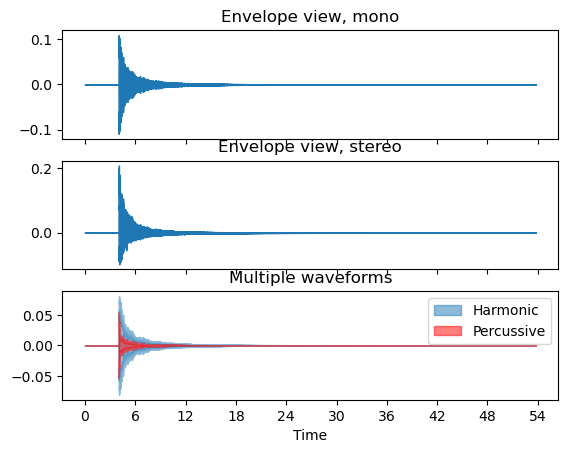

In [11]:
display_audio_graph(piano_ff['relative_path'].values[0])

In [20]:
def trim_and_display_graph(pth:str,top_db=15,display_graph=True):
    y,sr = librosa.load(BASE_PATH/pth, sr=None, mono=False)
    y_trim, idx = librosa.effects.trim(y, top_db=top_db)
    duration1 = librosa.get_duration(y=y,sr=sr)
    duration2 = librosa.get_duration(y=y_trim, sr=sr)
    print(f'audio duration: {duration1}',f'trimmed duration: {duration2}',f'ratio: {round(duration2/duration1, 2)}')
    if display_graph:
        display_audio2(pth)
        display_audio_data(y_trim, rate=sr)
    
        # display graph
        y_trim_padded = y.copy()
        y_trim_padded[0,:idx[0]] = 0
        y_trim_padded[1,:idx[0]] = 0
        y_trim_padded[0, idx[1]:] = 0
        y_trim_padded[1, idx[1]:] = 0
        display_audio_graph_with_data(y,y_trim_padded, sr=sr)
    
    return y_trim,duration1,duration2

In [13]:
file_pth = violin_arco['relative_path'].values[15]

audio duration: 1.7557142857142858 trimmed duration: 0.9868480725623583 ratio: 0.56


(array([[ 0.04678488,  0.05170107,  0.05646694, ..., -0.00997734,
         -0.0118717 , -0.01371098],
        [ 0.03480124,  0.04049563,  0.0467267 , ..., -0.00491142,
         -0.00702906, -0.00902772]], dtype=float32),
 1.7557142857142858,
 0.9868480725623583)

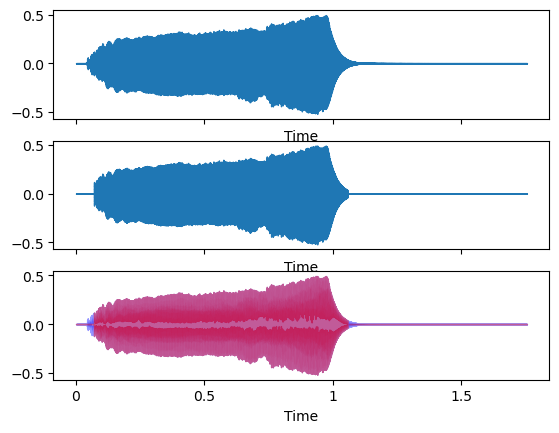

In [79]:
trim_and_display_graph(file_pth, 15)

audio duration: 1.7557142857142858 trimmed duration: 0.9287981859410431 ratio: 0.53


(array([[-0.00518513, -0.0229075 , -0.05680943, ..., -0.07785177,
         -0.07860792, -0.07928085],
        [-0.02105546, -0.0395422 , -0.06441534, ..., -0.07212102,
         -0.07288158, -0.07367551]], dtype=float32),
 1.7557142857142858,
 0.9287981859410431)

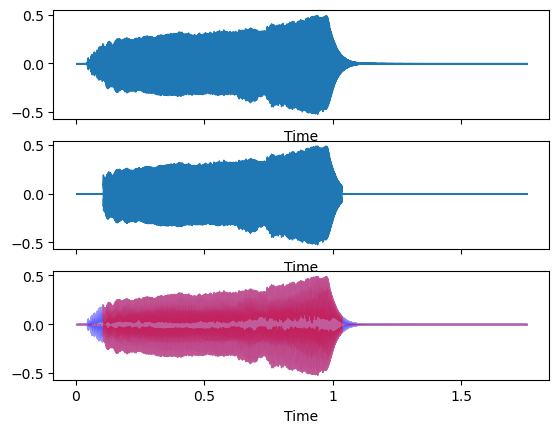

In [78]:
trim_and_display_graph(file_pth, 10)

In [15]:
def save_to_file(data, pth):
    pth.parent.mkdir(parents=True,exist_ok=True)
    splited = str(pth).split('.')
    splited[-1] = 'wav'
    output_pth = '.'.join(splited)
    sf.write(output_pth, data, 44100, format='wav', subtype='PCM_24')
    print(f"{'/'.join(str(pth).split('/')[-4:])}: OK")
    return output_pth

In [16]:
violin_arco['relative_path'].values[15]

'post2012/strings/violin/arco/Violin.arco.ff.sulG.Bb4.stereo.aif'

In [111]:
pth1 = violin_arco['relative_path'].values[15]
y_trim = trim_and_display_graph(pth1, 15, False)
pth2 = OUTPUT_PATH/pth1
saved_pth = save_to_file(y_trim.T, pth2)

audio duration: 1.7557142857142858 trimmed duration: 0.9868480725623583
strings/violin/arco/Violin.arco.ff.sulG.Bb4.stereo.aif: OK


#### Get audio trimmed duration and duration ratio

In [64]:
def get_duration_and_topdb_duration(row):
    pth = row['relative_path']
    y,sr = librosa.load(BASE_PATH/pth, sr=None, mono=False)
    y_10, idx1 = librosa.effects.trim(y, top_db=10)
    y_15, idx2 = librosa.effects.trim(y, top_db=15)
    duration = librosa.get_duration(y=y,sr=sr)
    duration10 = librosa.get_duration(y=y_10, sr=sr)
    duration15 = librosa.get_duration(y=y_15, sr=sr)
    top10_ratio = round(duration10/duration, 2)
    top15_ratio = round(duration15/duration, 2)
    return {
        'duration':duration,
        'duration10': duration10,
        'ratio10': top10_ratio,
        'duration15': duration15,
        'ratio15': top15_ratio
    }

res = df.apply(get_duration_and_topdb_duration ,axis=1)
df2 = df.copy()
df2['duration'] = [o['duration'] for o in res]
df2['top10db_duration'] = [o['duration10'] for o in res]
df2['top10db_ratio'] = [o['ratio10'] for o in res]
df2['top15db_duration'] = [o['duration15'] for o in res]
df2['top15db_ratio'] = [o['ratio15'] for o in res]
df2.to_csv('output2.csv',index=False)